In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Data Exploration and Preparation

In [2]:
df = pd.read_csv('datasets/sampled_aml_df_3.csv')
df.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1577509,155,CASH_OUT,427818.23,C1431817875,198219.00,0.00,C2131020093,0.00,427818.23,0,0
1,3869859,283,CASH_IN,68154.77,C397915380,2884459.21,2952613.98,C105277746,1030035.29,961880.52,0,0
2,5516324,380,CASH_OUT,80828.54,C809484944,0.00,0.00,C226553176,5149991.49,5230820.04,0,0
3,5490462,380,TRANSFER,106069.89,C1857104283,301258.00,195188.11,C1759851095,263816.83,369886.72,0,0
4,5606765,394,PAYMENT,34530.86,C1774638089,200755.00,166224.14,M1074240731,0.00,0.00,0,0


In [3]:
df.shape

(192500, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192500 entries, 0 to 192499
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           192500 non-null  int64  
 1   step            192500 non-null  int64  
 2   type            192500 non-null  object 
 3   amount          192500 non-null  float64
 4   nameOrig        192500 non-null  object 
 5   oldbalanceOrg   192500 non-null  float64
 6   newbalanceOrig  192500 non-null  float64
 7   nameDest        192500 non-null  object 
 8   oldbalanceDest  192500 non-null  float64
 9   newbalanceDest  192500 non-null  float64
 10  isFraud         192500 non-null  int64  
 11  isFlaggedFraud  192500 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 17.6+ MB


In [5]:
df.isnull().sum()

index             0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
print("Number of unique values in each column:")
print(df.nunique())

Number of unique values in each column:
index             192500
step                 743
type                   5
amount            187706
nameOrig          192494
oldbalanceOrg      95863
newbalanceOrig     80267
nameDest          168929
oldbalanceDest    108900
newbalanceDest    117213
isFraud                2
isFlaggedFraud         2
dtype: int64


In [7]:
df.drop(columns=['index', 'nameOrig', 'nameDest'], inplace=True)
df.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
81596,370,CASH_IN,217712.85,117991.73,335704.58,10599118.52,10381405.68,0,0
72451,186,CASH_OUT,37261.90,175389.55,138127.65,1388535.25,1425797.16,0,0
187859,95,CASH_OUT,53062.52,53062.52,0.00,4256174.24,4309236.76,1,0
19885,12,CASH_IN,60509.31,3687167.03,3747676.34,97655.02,252674.86,0,0
26631,140,CASH_IN,217431.22,4174053.60,4391484.83,7062395.67,6844964.45,0,0


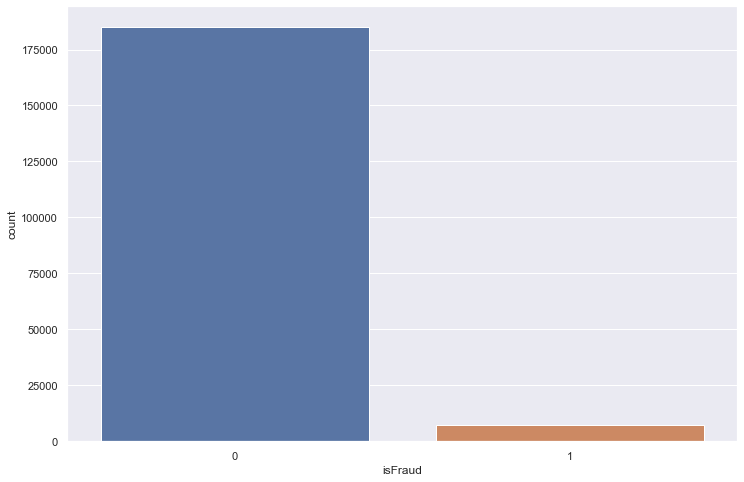

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x='isFraud', data=df);

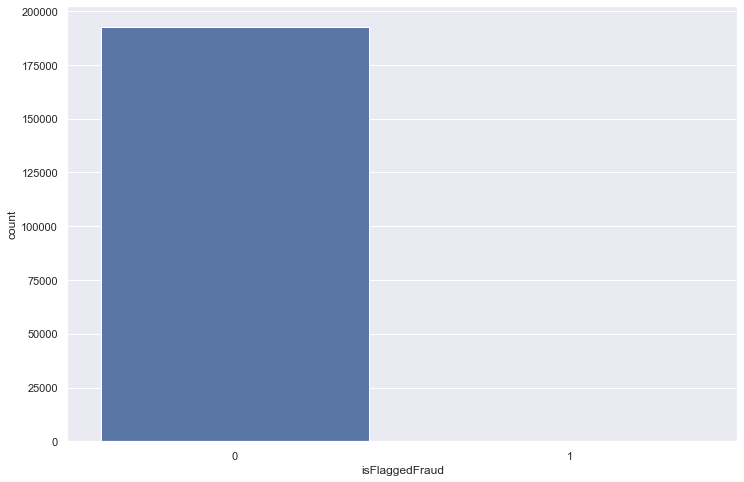

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='isFlaggedFraud', data=df);

In [10]:
df.isFlaggedFraud.value_counts()

0    192484
1        16
Name: isFlaggedFraud, dtype: int64

<Figure size 864x576 with 0 Axes>

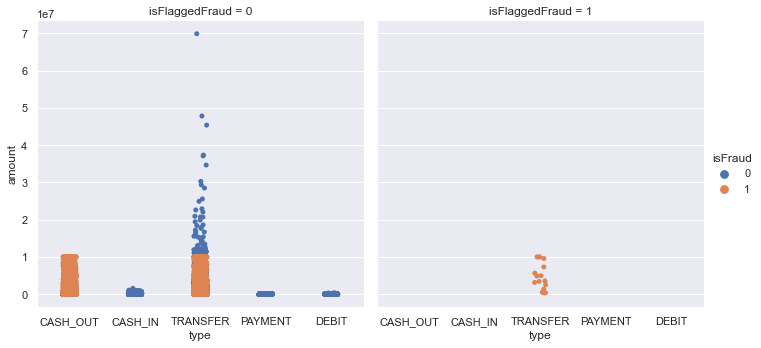

In [11]:
plt.figure(figsize=(12, 8))
sns.catplot(x='type',
            y='amount',
            estimator=sum,
            hue='isFraud',
            col='isFlaggedFraud',
            data=df);

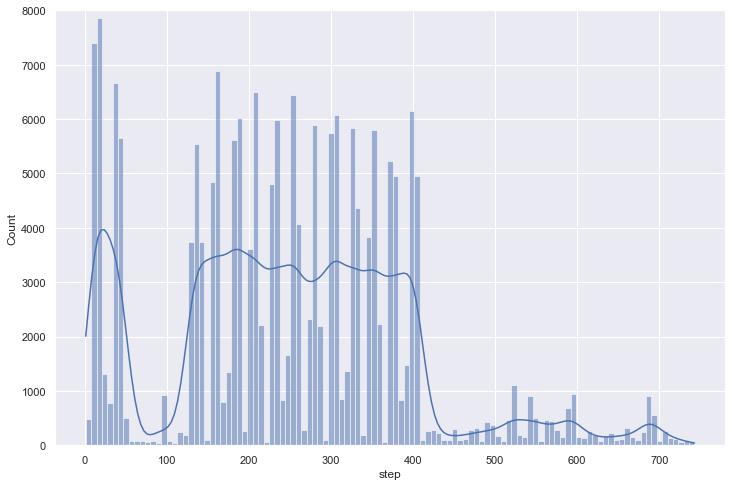

In [12]:
plt.figure(figsize=(12, 8))
plt.ylim(0, 8000)
sns.histplot(df.step, kde=True); # step is one hour of time

In [13]:
df['step'] = df['step'] % 24 # extracting time of day from step column
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11,CASH_OUT,427818.23,198219.00,0.00,0.00,427818.23,0,0
1,19,CASH_IN,68154.77,2884459.21,2952613.98,1030035.29,961880.52,0,0
2,20,CASH_OUT,80828.54,0.00,0.00,5149991.49,5230820.04,0,0
3,20,TRANSFER,106069.89,301258.00,195188.11,263816.83,369886.72,0,0
4,10,PAYMENT,34530.86,200755.00,166224.14,0.00,0.00,0,0


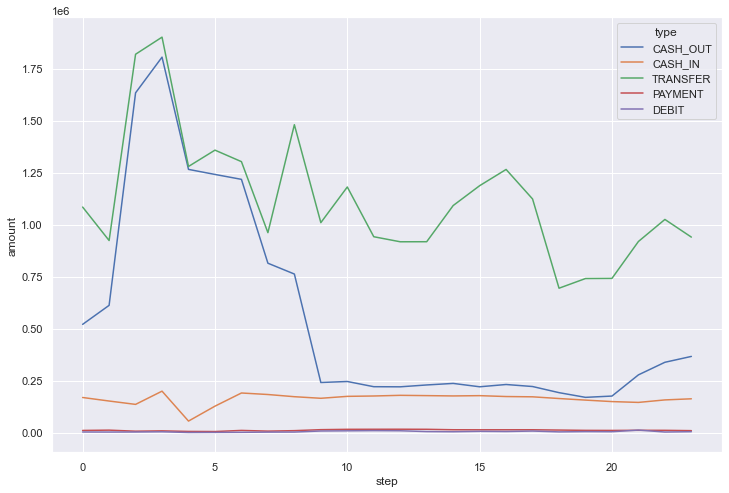

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='step', y='amount', hue='type', ci=None,
                estimator='mean', data=df);

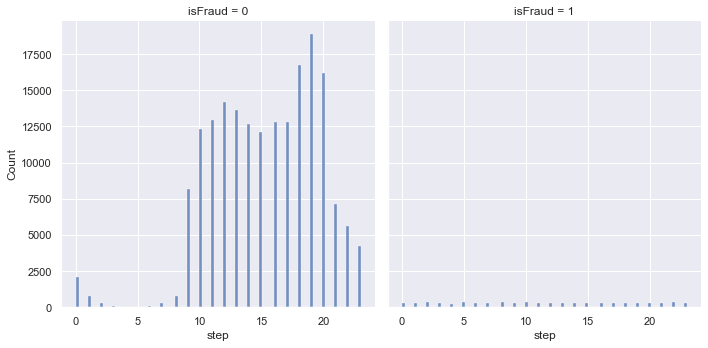

In [15]:
sns.displot(data=df, x='step', col='isFraud');

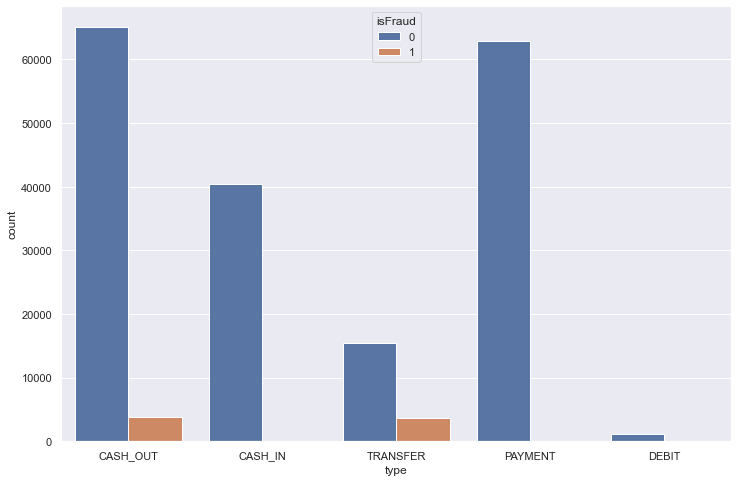

In [16]:
plt.figure(figsize=(12, 8))

sns.countplot(x='type', hue='isFraud', data=df);

In [17]:
df = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
df.shape

(87998, 9)

In [18]:
df = pd.concat([df,
                pd.get_dummies(df.type, prefix='type', drop_first=True)],
                axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_TRANSFER
0,11,CASH_OUT,427818.23,198219.0,0.00,0.00,427818.23,0,0,0
2,20,CASH_OUT,80828.54,0.0,0.00,5149991.49,5230820.04,0,0,0
3,20,TRANSFER,106069.89,301258.0,195188.11,263816.83,369886.72,0,0,1
6,18,CASH_OUT,402832.90,11665.0,0.00,28550.98,431383.87,0,0,0
12,22,CASH_OUT,34643.49,0.0,0.00,346081.41,380724.90,0,0,0


In [19]:
df.drop(columns=['type', 'isFlaggedFraud'], inplace=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER
0,11,427818.23,198219.0,0.00,0.00,427818.23,0,0
2,20,80828.54,0.0,0.00,5149991.49,5230820.04,0,0
3,20,106069.89,301258.0,195188.11,263816.83,369886.72,0,1
6,18,402832.90,11665.0,0.00,28550.98,431383.87,0,0
12,22,34643.49,0.0,0.00,346081.41,380724.90,0,0


In [20]:
df.isFraud.value_counts()

0    80498
1     7500
Name: isFraud, dtype: int64

In [21]:
df['origBalanceDiscrepancy'] = df.newbalanceOrig - df.oldbalanceOrg + df.amount
df['destBalanceDiscrepancy'] = df.oldbalanceDest - df.newbalanceDest + df.amount

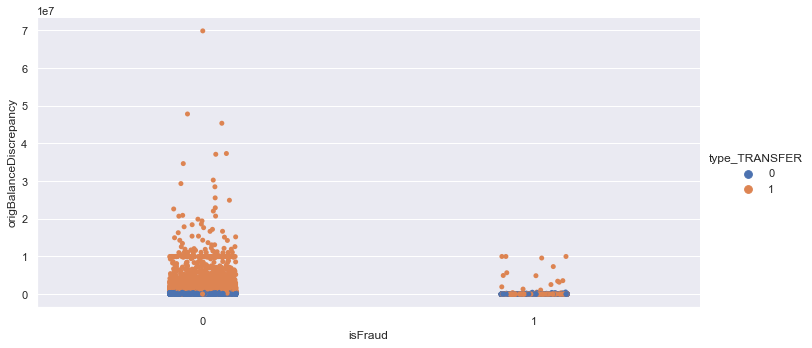

In [22]:
sns.catplot(x='isFraud', y='origBalanceDiscrepancy',
            estimator=sum, hue='type_TRANSFER',
            data=df, aspect=2);

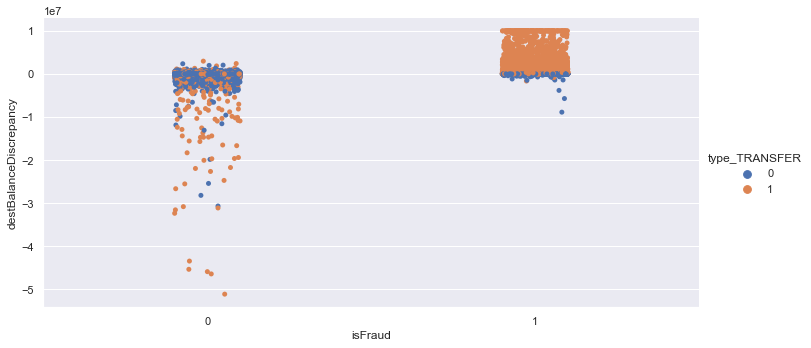

In [23]:
sns.catplot(x='isFraud', y='destBalanceDiscrepancy',
            estimator=sum, hue='type_TRANSFER',
            data=df, aspect=2);

In [24]:
df.to_csv('datasets/preprocessed_transaction_data.csv', index=False)

# Model Building

In [25]:
df = pd.read_csv('datasets/preprocessed_transaction_data.csv')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns=['isFraud'])
y = df.isFraud

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61598, 9) (26400, 9) (61598,) (26400,)


In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred_log_reg = log_reg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print('Logistic Regression')
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     24197
           1       0.76      0.90      0.83      2203

    accuracy                           0.97     26400
   macro avg       0.88      0.94      0.91     26400
weighted avg       0.97      0.97      0.97     26400

[[23581   616]
 [  212  1991]]


In [33]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_gnb = gnb_clf.predict(X_test)
print('Naive Bayes')
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24197
           1       0.82      0.38      0.52      2203

    accuracy                           0.94     26400
   macro avg       0.88      0.69      0.74     26400
weighted avg       0.94      0.94      0.93     26400

[[24016   181]
 [ 1363   840]]


In [34]:
# from sklearn.svm import SVC
# svc_clf = SVC()
# svc_clf.fit(X_train, y_train)
# y_pred_svc = svc_clf.predict(X_test)
# print('SVC')
# print(classification_report(y_test, y_pred_svc))
# print(confusion_matrix(y_test, y_pred_svc))

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24197
           1       1.00      1.00      1.00      2203

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400

[[24197     0]
 [    6  2197]]


In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print('AdaBoost')
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24197
           1       0.99      1.00      1.00      2203

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400

[[24185    12]
 [    7  2196]]


In [38]:
from sklearn.metrics import roc_auc_score
print(f'Logistic Regression AUC: {roc_auc_score(y_test, y_pred_log_reg)}')
print(f'Naive Bayes AUC: {roc_auc_score(y_test, y_pred_gnb)}')
print(f'Random Forest AUC: {roc_auc_score(y_test, y_pred_rf)}')
print(f'AdaBoost AUC: {roc_auc_score(y_test, y_pred_ada)}')

Logistic Regression AUC: 0.9391549441412693
Naive Bayes AUC: 0.6869089817690472
Random Forest AUC: 0.9986382206082615
AdaBoost AUC: 0.9981632927525914


In [39]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_log_reg)
fpr_naive, tpr_naive, thresholds_naive = roc_curve(y_test, y_pred_gnb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)

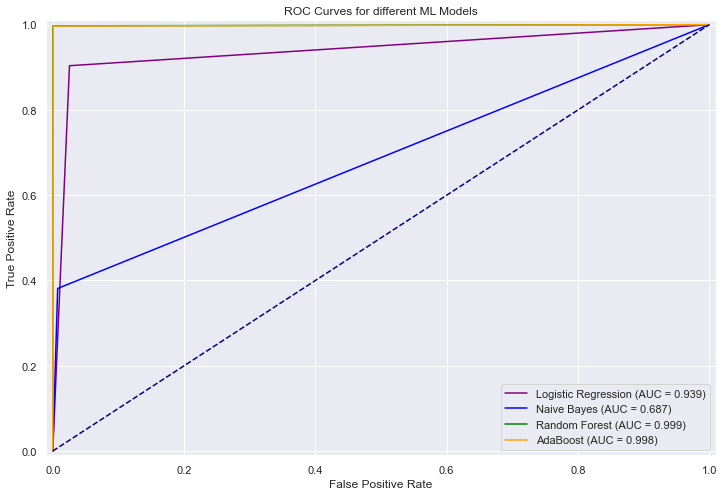

In [40]:
plt.figure(figsize=(12, 8))

plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_log_reg):.3f})',
            color='purple')

plt.plot(fpr_naive, tpr_naive, color='blue',
            label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_gnb):.3f})')

plt.plot(fpr_rf, tpr_rf, color='green',
            label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_rf):.3f})')

plt.plot(fpr_ada, tpr_ada, color='orange',
            label=f'AdaBoost (AUC = {roc_auc_score(y_test, y_pred_ada):.3f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curves for different ML Models')
plt.legend(loc="lower right");